# Introdução

Dataset: https://www.kaggle.com/code/vatsalmavani/music-recommendation-system-using-spotify-dataset/data

Este projeto tem como objetivo analisar e entender como os diversos atributos (acousticness, danceability, energy, etc) estão relacionados ao artista, ano e gênero da música.

### Entendendo os atributos

As definições foram retiradas de: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

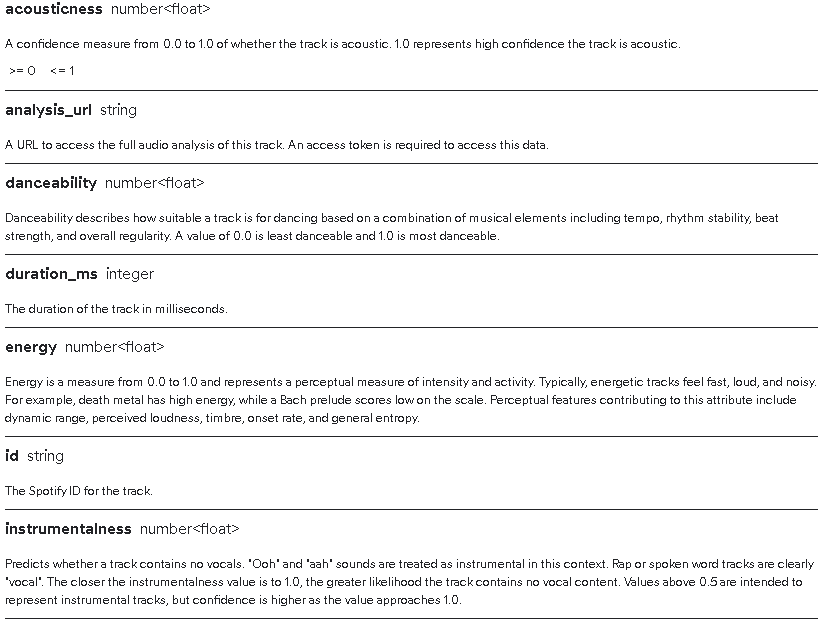
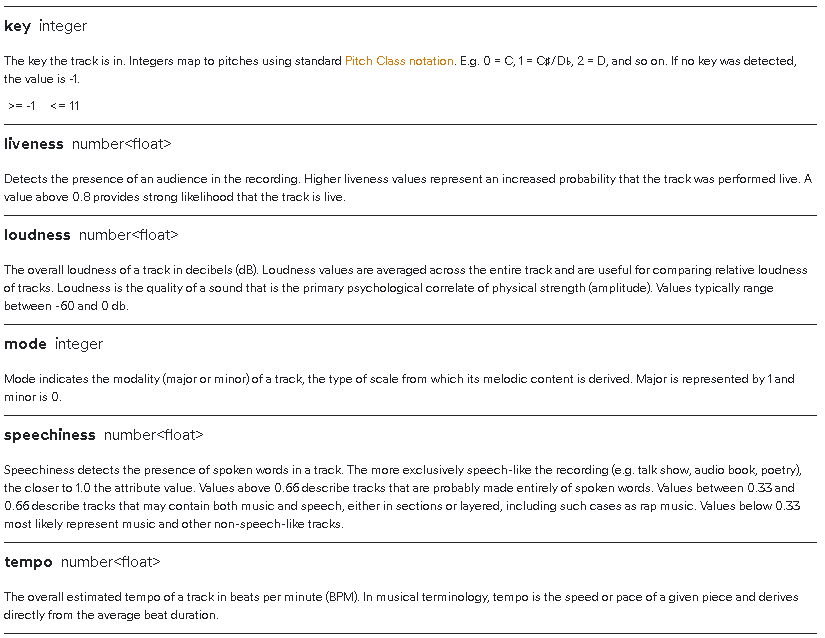
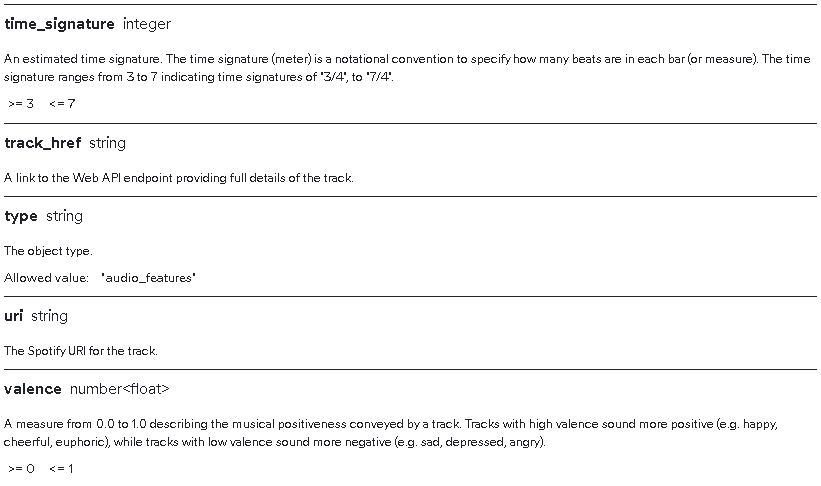

# Tratamento de dados

### Importando bibliotecas e dados

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [151]:
data = pd.read_csv('data\data_w_genres.csv') 
data_genre = pd.read_csv('data\data_by_genres.csv')
data_year = pd.read_csv('data\data_by_year.csv')

In [152]:
data_genre.shape

(2973, 14)

In [153]:
data_genre.genres.value_counts()

21st century classical    1
north carolina roots      1
nordic soundtrack         1
norman ok indie           1
norsk lovsang             1
                         ..
ethio-jazz                1
ethiopian pop             1
ethnomusicology           1
ethnotronica              1
zydeco                    1
Name: genres, Length: 2973, dtype: int64

Através do data_genre sabemos que no banco de dados do spotify estão listados 2973 gêneros diferentes.

In [154]:
data.head(10)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7
5,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.609556,0.487278,205091.944444,0.309906,0.004696,0.274767,-18.266389,0.098022,118.648944,0.441556,32.777778,5,1,36
6,[],"""Mama"" Helen Teagarden",0.725000,0.637000,135533.000000,0.512000,0.186000,0.426000,-20.615000,0.210000,134.819000,0.885000,0.000000,8,1,2
7,[],"""Test for Victor Young""",0.927000,0.734000,175693.000000,0.474000,0.076200,0.737000,-10.544000,0.256000,132.788000,0.902000,3.000000,10,1,2
8,"['comedy rock', 'comic', 'parody']","""Weird Al"" Yankovic",0.173145,0.662787,218948.196721,0.695393,0.000050,0.161102,-9.768705,0.084536,133.031180,0.751344,34.229508,9,1,122
9,"['emo rap', 'florida rap', 'sad rap', 'undergr...",$NOT,0.544467,0.789800,137910.466667,0.532933,0.023063,0.180300,-9.149267,0.293687,112.344800,0.480700,67.533333,1,1,15


Verificamos também que precisamos modificar a coluna 'genres' de data. Quando um artista possui mais de um gênero, todos os gêneros aparecem na mesma linha no formato de uma única string. Vamos modificá-la para que cada gênero apareça em uma linha diferente. Isso facilitará a análise posteriormente.

In [155]:
generos = data.genres
generos

0                                           ['show tunes']
1                                                       []
2                                                       []
3                                                       []
4                                                       []
                               ...                        
28675                                                   []
28676    ['c-pop', 'classic cantopop', 'classic mandopo...
28677                                                   []
28678              ['chinese indie', 'chinese indie rock']
28679                               ['classic korean pop']
Name: genres, Length: 28680, dtype: object

In [156]:
lista_generos_data_w_genres = [] # Lista para colocar um gênero por linha
num_generos_contidos = [] # Número de gêneros contidos em cada artista

for genero in generos:
    # Retirar todos os caracteres especiais e depois separá-los em uma lista
    genero = genero.replace('[','').replace(']','').replace('"','').replace("'","").split(',') 
    num_generos_contidos.append(len(genero))
    for gen in genero:
        gen = gen.strip()
        lista_generos_data_w_genres.append(gen)

In [157]:
generos_unicos = np.unique(lista_generos_data_w_genres)
len(generos_unicos)

2973

O número de gêneros únicos em 'lista_generos_data_w_genres' corresponde com o que achamos em 'data_genre' (2973).

In [158]:
# Criando uma cópia do dataframe para não modificar o original
df = data.copy() 

A partir de agora, usaremos apenas o DataFrame 'df'.

In [159]:
df['repetir n vezes'] = num_generos_contidos

In [160]:
# Repetir a linha n vezes, sendo n a quantidade de gêneros que um artista possui 
df  = df.loc[df.index.repeat(df['repetir n vezes'])] 

In [161]:
df.tail(20)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,repetir n vezes
28666,['taiwan campus folk'],陳蘭麗,0.502000,0.609000,152883.000000,0.83300,0.000000,0.134000,-6.261000,0.215000,154.596000,0.718000,35.000000,0,1,2,1
28667,['classic cantopop'],陳麗斯,0.562000,0.550000,195013.000000,0.37500,0.000004,0.244000,-12.277000,0.033200,75.703000,0.405000,33.000000,0,1,2,1
28668,[],霜華雪華,0.915687,0.356542,212896.854167,0.06924,0.004585,0.147537,-23.461229,0.051515,105.645438,0.338398,25.166667,0,1,96,1
28669,[],韋綺珊,0.758000,0.588000,266000.000000,0.35400,0.000006,0.144000,-14.259000,0.027000,131.790000,0.398000,42.000000,6,0,1,1
28670,[],須永ひろし,0.911000,0.673000,413800.000000,0.13500,0.574000,0.100000,-20.876000,0.036400,123.575000,0.358000,27.000000,7,0,2,1
28671,[],須田景凪,0.028100,0.559000,209636.000000,0.87300,0.000000,0.185000,-4.401000,0.054300,150.055000,0.797000,67.000000,0,0,2,1
28672,[],高慧君,0.686000,0.520000,286840.000000,0.28500,0.000000,0.093100,-10.754000,0.027000,93.922000,0.079800,53.000000,10,1,2,1
28673,"['c-pop', 'classic mandopop', 'vintage chinese...",鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3
28673,"['c-pop', 'classic mandopop', 'vintage chinese...",鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3
28673,"['c-pop', 'classic mandopop', 'vintage chinese...",鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3


In [162]:
 # Substituir os valores da coluna genre com os valores corretos
df['genres'] = lista_generos_data_w_genres

In [163]:
df.tail(20)

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,repetir n vezes
28666,taiwan campus folk,陳蘭麗,0.502000,0.609000,152883.000000,0.83300,0.000000,0.134000,-6.261000,0.215000,154.596000,0.718000,35.000000,0,1,2,1
28667,classic cantopop,陳麗斯,0.562000,0.550000,195013.000000,0.37500,0.000004,0.244000,-12.277000,0.033200,75.703000,0.405000,33.000000,0,1,2,1
28668,,霜華雪華,0.915687,0.356542,212896.854167,0.06924,0.004585,0.147537,-23.461229,0.051515,105.645438,0.338398,25.166667,0,1,96,1
28669,,韋綺珊,0.758000,0.588000,266000.000000,0.35400,0.000006,0.144000,-14.259000,0.027000,131.790000,0.398000,42.000000,6,0,1,1
28670,,須永ひろし,0.911000,0.673000,413800.000000,0.13500,0.574000,0.100000,-20.876000,0.036400,123.575000,0.358000,27.000000,7,0,2,1
28671,,須田景凪,0.028100,0.559000,209636.000000,0.87300,0.000000,0.185000,-4.401000,0.054300,150.055000,0.797000,67.000000,0,0,2,1
28672,,高慧君,0.686000,0.520000,286840.000000,0.28500,0.000000,0.093100,-10.754000,0.027000,93.922000,0.079800,53.000000,10,1,2,1
28673,c-pop,鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3
28673,classic mandopop,鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3
28673,vintage chinese pop,鳳飛飛,0.884000,0.358000,259387.000000,0.20800,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,43.000000,10,1,2,3


In [164]:
df.genres.replace('', pd.NA, inplace=True)

In [165]:
df.drop('repetir n vezes', axis=1, inplace=True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74911 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            65054 non-null  object 
 1   artists           74911 non-null  object 
 2   acousticness      74911 non-null  float64
 3   danceability      74911 non-null  float64
 4   duration_ms       74911 non-null  float64
 5   energy            74911 non-null  float64
 6   instrumentalness  74911 non-null  float64
 7   liveness          74911 non-null  float64
 8   loudness          74911 non-null  float64
 9   speechiness       74911 non-null  float64
 10  tempo             74911 non-null  float64
 11  valence           74911 non-null  float64
 12  popularity        74911 non-null  float64
 13  key               74911 non-null  int64  
 14  mode              74911 non-null  int64  
 15  count             74911 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

O dataframe agora está pronto para análise!

## Análise exploratória de dados (EDA)

In [167]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,74911.000000,74911.000000,7.491100e+04,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000,74911.000000
mean,0.396676,0.559031,2.440243e+05,0.555646,0.149868,0.196063,-10.126274,0.087290,118.139670,0.521732,39.654475,5.475164,0.768378,22.255103
std,0.341268,0.163683,9.884551e+04,0.240067,0.268179,0.123470,5.223291,0.093640,22.360958,0.223769,18.970955,3.505637,0.421871,62.852771
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.085570,0.456000,1.925182e+05,0.380775,0.000011,0.115667,-12.547333,0.039360,104.644000,0.365000,31.000000,2.000000,1.000000,2.000000
50%,0.295667,0.564000,2.303562e+05,0.584621,0.003040,0.165980,-9.066500,0.051900,117.998333,0.531769,43.000000,6.000000,1.000000,5.000000
75%,0.712571,0.676500,2.736410e+05,0.739300,0.156186,0.235063,-6.342000,0.090533,129.973000,0.686333,53.000000,9.000000,1.000000,16.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,93.000000,11.000000,1.000000,3169.000000


<BarContainer object of 10 artists>

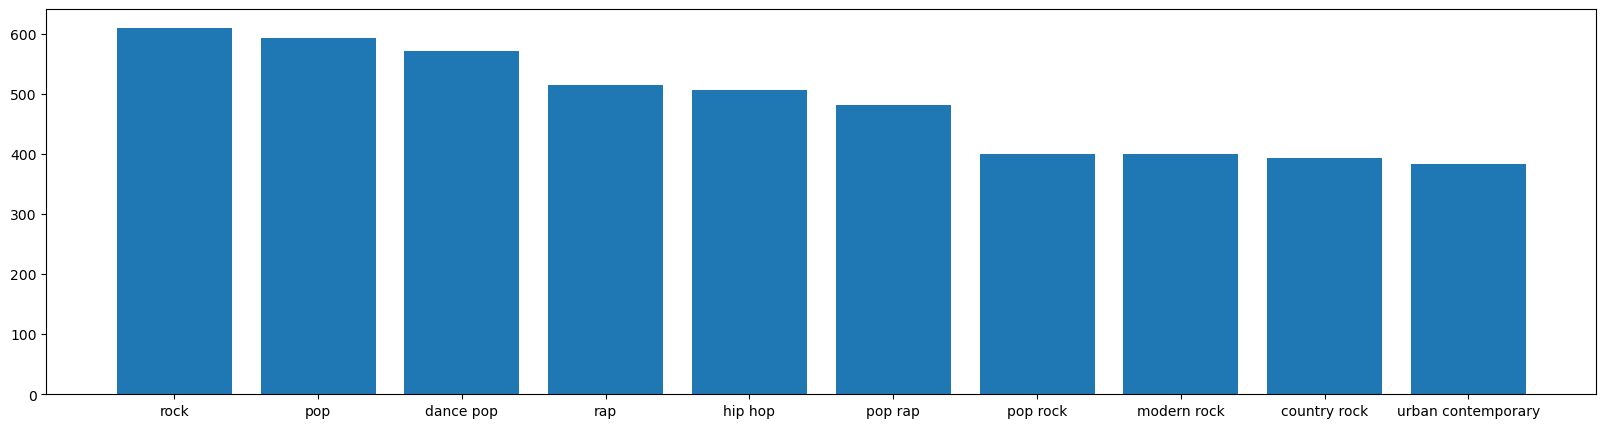

In [168]:
plt.figure(figsize=(20,5))
plt.bar(x=df.genres.value_counts()[:10].index, height=df.genres.value_counts()[:10])

Segundo o gráfico acima podemos verificar que o gênero rock possui a maior quantidade de artistas listados na plataforma do spotify, seguido por pop e dance pop. É interessante observar que no top 10, 7 são variações de rock e/ou pop.

In [169]:
top_10_gen = df.genres.value_counts()[:10].index
top_10_gen

Index(['rock', 'pop', 'dance pop', 'rap', 'hip hop', 'pop rap', 'pop rock',
       'modern rock', 'country rock', 'urban contemporary'],
      dtype='object')

In [170]:
df.columns

Index(['genres', 'artists', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')

In [171]:
df_top_10 = df[df.genres.isin(top_10_gen)]
df_top_10

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
22,dance pop,*NSYNC,0.191611,0.608743,236775.152381,0.694429,0.002703,0.202860,-6.273800,0.057138,115.615886,0.564781,45.371429,0,1,105
22,pop,*NSYNC,0.191611,0.608743,236775.152381,0.694429,0.002703,0.202860,-6.273800,0.057138,115.615886,0.564781,45.371429,0,1,105
24,modern rock,...And You Will Know Us by the Trail of Dead,0.008410,0.255000,273624.000000,0.858000,0.000355,0.513000,-5.085000,0.069400,144.653000,0.237000,36.000000,7,1,2
30,pop rock,"10,000 Maniacs",0.190833,0.584476,236012.619048,0.542076,0.008760,0.229705,-13.288048,0.037852,118.476095,0.573810,37.000000,9,1,42
33,rock,10cc,0.230821,0.560632,298796.578947,0.567316,0.007471,0.152095,-10.354053,0.066111,121.800263,0.555000,41.578947,7,1,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28283,pop rap,tobi lou,0.428500,0.811250,230759.250000,0.550500,0.000008,0.138500,-9.303250,0.144875,131.743250,0.626500,66.750000,5,1,8
28292,dance pop,will.i.am,0.099131,0.788405,234544.837838,0.731324,0.000023,0.166865,-6.332027,0.120111,119.170514,0.655378,54.027027,1,0,37
28292,pop,will.i.am,0.099131,0.788405,234544.837838,0.731324,0.000023,0.166865,-6.332027,0.120111,119.170514,0.655378,54.027027,1,0,37
28292,pop rap,will.i.am,0.099131,0.788405,234544.837838,0.731324,0.000023,0.166865,-6.332027,0.120111,119.170514,0.655378,54.027027,1,0,37


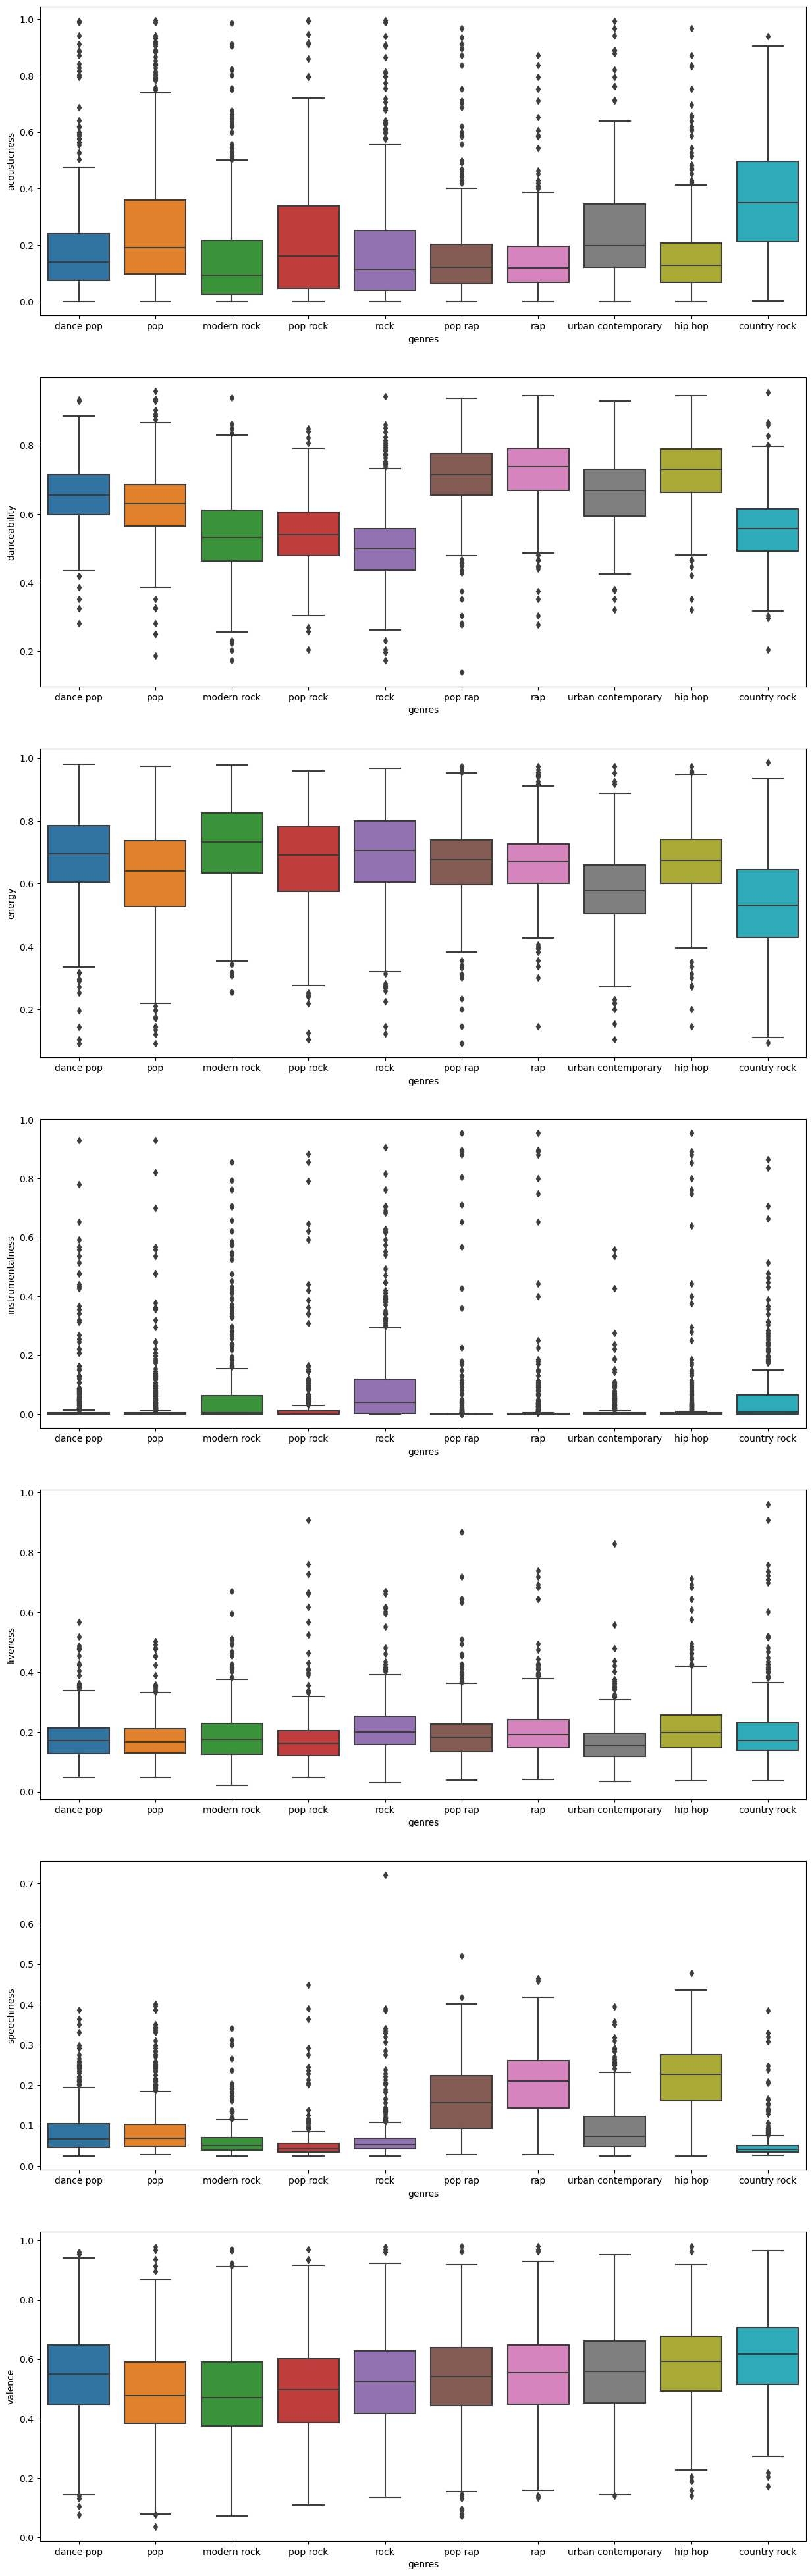

In [189]:
plt.figure(figsize=(15,50))

i = 1
atributos = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
for atr in atributos:
    plt.subplot(7,1,i)
    sns.boxplot(df_top_10, x='genres', y=atr)
    i+=1

In [173]:
atributos = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
atributos_genero = {}

for gen in top_10_gen:
    atr_valores = []
    for atr in atributos:
        atr_valores.append(df[df.genres == gen][atr].median().round(4))
    atributos_genero[gen] = atr_valores
atributos_genero

{'rock': [0.1149, 0.4999, 0.7049, 0.0414, 0.1999, 0.0514, 0.523],
 'pop': [0.1915, 0.6311, 0.6417, 0.0001, 0.166, 0.0688, 0.4775],
 'dance pop': [0.1404, 0.6555, 0.6952, 0.0002, 0.1717, 0.0668, 0.55],
 'rap': [0.118, 0.7383, 0.6692, 0.0001, 0.1901, 0.2098, 0.5548],
 'hip hop': [0.1284, 0.7301, 0.674, 0.0001, 0.1976, 0.2263, 0.5928],
 'pop rap': [0.1204, 0.7144, 0.6764, 0.0, 0.1818, 0.1566, 0.5423],
 'pop rock': [0.1603, 0.5406, 0.691, 0.0007, 0.161, 0.042, 0.4976],
 'modern rock': [0.0933, 0.5331, 0.7324, 0.0049, 0.1747, 0.0504, 0.4713],
 'country rock': [0.3485, 0.5573, 0.532, 0.0078, 0.172, 0.04, 0.616],
 'urban contemporary': [0.1972, 0.6687, 0.5775, 0.0001, 0.156, 0.073, 0.5592]}

É importante observar que conseguimos o valor de cada atributo calculando-se a sua mediana e não sua média. A escolha da mediana se deu por ser uma métrica mais robusta, evitando muito a influência de outliers.

In [174]:
resumo = pd.DataFrame(atributos_genero, index=atributos)

<AxesSubplot: >

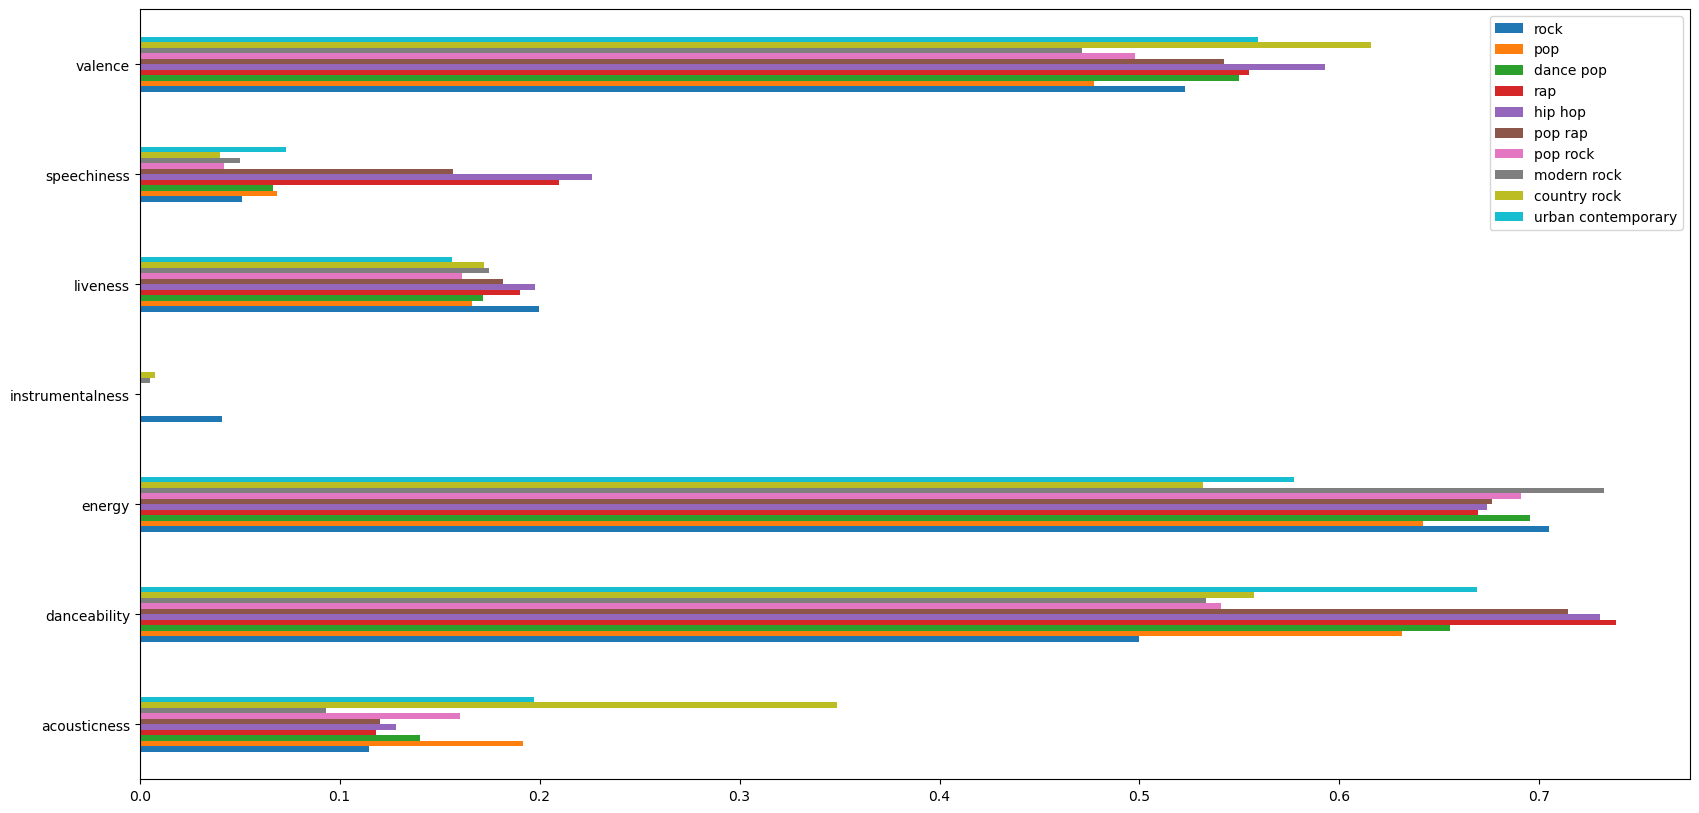

In [180]:
resumo.plot(kind = 'barh', figsize=(20,10))

In [176]:
resumo

,rock,pop,dance pop,rap,hip hop,pop rap,pop rock,modern rock,country rock,urban contemporary
acousticness,0.1149,0.1915,0.1404,0.1180,0.1284,0.1204,0.1603,0.0933,0.3485,0.1972
danceability,0.4999,0.6311,0.6555,0.7383,0.7301,0.7144,0.5406,0.5331,0.5573,0.6687
energy,0.7049,0.6417,0.6952,0.6692,0.6740,0.6764,0.6910,0.7324,0.5320,0.5775
instrumentalness,0.0414,0.0001,0.0002,0.0001,0.0001,0.0000,0.0007,0.0049,0.0078,0.0001
liveness,0.1999,0.1660,0.1717,0.1901,0.1976,0.1818,0.1610,0.1747,0.1720,0.1560
speechiness,0.0514,0.0688,0.0668,0.2098,0.2263,0.1566,0.0420,0.0504,0.0400,0.0730
valence,0.5230,0.4775,0.5500,0.5548,0.5928,0.5423,0.4976,0.4713,0.6160,0.5592
